# LCR

Laplacian convolutional representation (LCR) for traffic time series imputation.

In [1]:
import numpy as np

def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

def laplacian(n, tau):
    ell = np.zeros(n)
    ell[0] = 2 * tau
    for k in range(tau):
        ell[k + 1] = -1
        ell[-k - 1] = -1
    return ell

def prox(z, w, lmbda, denominator):
    T = z.shape[0]
    temp1 = np.fft.fft(lmbda * z - w) / denominator
    temp2 = 1 - T / (denominator * np.abs(temp1))
    temp2[temp2 <= 0] = 0
    return np.fft.ifft(temp1 * temp2).real

def update_z(y_train, pos_train, x, w, lmbda, eta):
    z = x + w / lmbda
    z[pos_train] = (lmbda / (lmbda + eta) * z[pos_train] 
                    + eta / (lmbda + eta) * y_train)
    return z

def update_w(x, z, w, lmbda):
    return w + lmbda * (x - z)

def LCR(y_true, y, lmbda, gamma, tau, maxiter = 50):
    eta = 100 * lmbda
    T = y.shape
    pos_train = np.where(y != 0)
    y_train = y[pos_train]
    pos_test = np.where((y_true != 0) & (y == 0))
    y_test = y_true[pos_test]
    z = y.copy()
    w = y.copy()
    ell = np.fft.fft(laplacian(T, tau))
    denominator = lmbda + gamma * np.abs(ell) ** 2
    del y_true, y
    show_iter = 100
    for it in range(maxiter):
        x = prox(z, w, lmbda, denominator)
        z = update_z(y_train, pos_train, x, w, lmbda, eta)
        w = update_w(x, z, w, lmbda)
        if (it + 1) % show_iter == 0:
            print(it + 1)
            print(compute_mape(y_test, x[pos_test]))
            print(compute_rmse(y_test, x[pos_test]))
            print()
    return x

**Evaluate the empirical time complexity**: First generating Data of Length $2^{10},2^{11},\ldots,2^{20}$.

In [2]:
import numpy as np
np.random.seed(1)
import time

tau = 2
t = 0
repeat = 50
time_mat1 = np.zeros((11, repeat))
for power in range(10, 21, 1):
    print('Power = {}'.format(power))
    T = 2 ** power
    y = np.random.randn(T)
    lmbda = 5e-3 * T
    gamma = 2 * lmbda
    for i in range(repeat):
        start = time.time() * 1000
        x = LCR(y, y, lmbda, gamma, tau)
        end = time.time() * 1000
        time_mat1[t, i] = end - start
        print('Running time: %d milliseconds.'%(time_mat1[t, i]))
        print()
    t += 1

Power = 10
Running time: 5 milliseconds.

Running time: 4 milliseconds.

Running time: 3 milliseconds.

Running time: 3 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 2 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds.

Running time: 1 milliseconds

Empirical time complexity. The model is tested 50 times on each generated data.

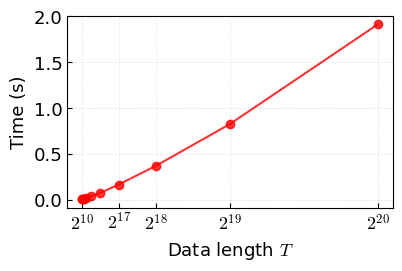

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
plt.rcParams['mathtext.fontset'] = 'cm'

fig = plt.figure(figsize = (4.2, 2.5))
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.array([2**10, 2**11, 2**12, 2**13, 2**14, 2**15,
                   2**16, 2**17, 2**18, 2**19, 2**20]), 
         np.mean(time_mat1, axis = 1) / 1000, '-o', color = 'r', alpha = 0.8)

plt.xlabel(r'Data length $T$')
plt.ylabel('Time (s)')
labels = [r'$2^{10}$', r'$2^{17}$',
          r'$2^{18}$', r'$2^{19}$', r'$2^{20}$']
plt.xticks(np.array([2**10, 2**17, 2**18, 2**19, 2**20]), labels)
ax.tick_params(direction = 'in')
ax.tick_params(which = 'minor', direction = 'in')
ax.grid(color='gray', linestyle='dashed', linewidth=0.5, alpha=0.2)
plt.show()
fig.savefig('../results/empirical_time_complexity_curve_linear.pdf', bbox_inches = 'tight')

Univariate time series imputation on the Portland traffic speed time series.


In [ ]:
import numpy as np

def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

def laplacian(n, tau):
    ell = np.zeros(n)
    ell[0] = 2 * tau
    for k in range(tau):
        ell[k + 1] = -1
        ell[-k - 1] = -1
    return ell

def prox(z, w, lmbda, denominator):
    T = z.shape[0]
    temp1 = np.fft.fft(lmbda * z - w) / denominator
    temp2 = 1 - T / (denominator * np.abs(temp1))
    temp2[temp2 <= 0] = 0
    return np.fft.ifft(temp1 * temp2).real

def update_z(y_train, pos_train, x, w, lmbda, eta):
    z = x + w / lmbda
    z[pos_train] = (lmbda / (lmbda + eta) * z[pos_train] 
                    + eta / (lmbda + eta) * y_train)
    return z

def update_w(x, z, w, lmbda):
    return w + lmbda * (x - z)

def LCR(y_true, y, lmbda, gamma, tau, maxiter = 50, show_iter = 100):
    eta = 100 * lmbda
    T = y.shape
    pos_train = np.where(y != 0)
    y_train = y[pos_train]
    pos_test = np.where((y_true != 0) & (y == 0))
    y_test = y_true[pos_test]
    z = y.copy()
    w = y.copy()
    ell = np.fft.fft(laplacian(T, tau))
    denominator = lmbda + gamma * np.abs(ell) ** 2
    del y_true, y
    for it in range(maxiter):
        x = prox(z, w, lmbda, denominator)
        z = update_z(y_train, pos_train, x, w, lmbda, eta)
        w = update_w(x, z, w, lmbda)
        if (it + 1) % show_iter == 0:
            print(it + 1)
            print(compute_mape(y_test, x[pos_test]))
            print(compute_rmse(y_test, x[pos_test]))
            print()
    return x

Portland traffic speed time series reconstruction on the fully observed data.

Missing rate = 0.0
100
nan
nan

Running time: 0 seconds.


/var/folders/l9/9lchx8r164b8tdbkf0b8_ff00000gn/T/ipykernel_23084/1531599762.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(var - var_hat) / var) / var.shape[0]
/var/folders/l9/9lchx8r164b8tdbkf0b8_ff00000gn/T/ipykernel_23084/1531599762.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])


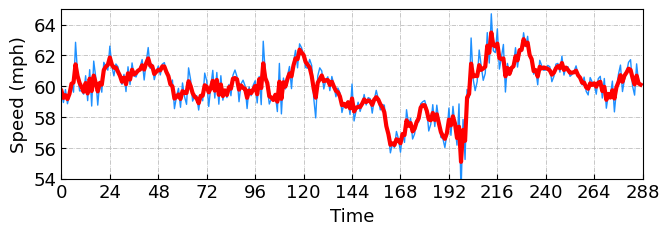

In [4]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.0
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/speed.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

import time
start = time.time()
lmbda = 1e-2 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_vec, sparse_vec, lmbda, gamma, tau, maxiter)
end = time.time()
print('Running time: %d seconds.'%(end - start))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize = (7.5, 2.2))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1)
plt.plot(x[: 96 * d], 'red', linewidth = 3)
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xlim([0, 96 * d])
plt.ylim([54, 65])
plt.xticks(np.arange(0, 96 * d + 1, 24))
plt.yticks(np.arange(54, 66, 2))
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

# plt.savefig('speeds_{}.pdf'.format(round(missing_rate * 100)), bbox_inches = 'tight')
plt.show()

Portland traffic speed time series imputation on the partially observed data with the 80% missing rate.

Missing rate = 0.8
100
0.013591253440075765
1.0870813163593949

Running time: 0 seconds.


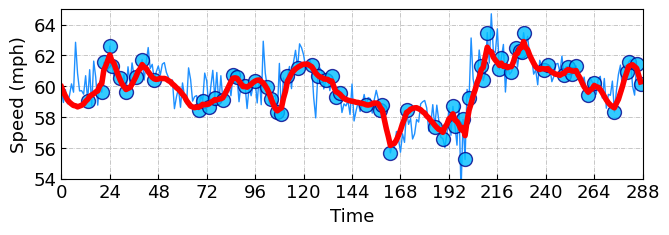

In [5]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.8
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/speed.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

import time
start = time.time()
lmbda = 1e-2 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_vec, sparse_vec, lmbda, gamma, tau, maxiter)
end = time.time()
print('Running time: %d seconds.'%(end - start))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize = (7.5, 2.2))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1)
plt.plot(np.arange(0, 96 * d), sparse_vec[: 96 * d], 'o', 
         markeredgecolor = 'darkblue', alpha = missing_rate,
         markerfacecolor = 'deepskyblue', markersize = 10)
plt.plot(x[: 96 * d], 'red', linewidth = 4)
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xlim([0, 96 * d])
plt.ylim([54, 65])
plt.xticks(np.arange(0, 96 * d + 1, 24))
plt.yticks(np.arange(54, 66, 2))
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

# plt.savefig('speeds_{}.pdf'.format(round(missing_rate * 100)), bbox_inches = 'tight')
plt.show()

Portland traffic speed time series imputation on the partially observed data with the 90% missing rate.

Missing rate = 0.9
100
0.015361255013015863
1.170996245735941

Running time: 0 seconds.


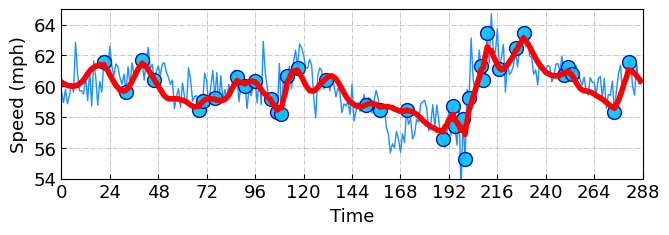

In [6]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.9
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/speed.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

import time
start = time.time()
lmbda = 1e-2 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_vec, sparse_vec, lmbda, gamma, tau, maxiter)
end = time.time()
print('Running time: %d seconds.'%(end - start))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize = (7.5, 2.2))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1)
plt.plot(np.arange(0, 96 * d), sparse_vec[: 96 * d], 'o', 
         markeredgecolor = 'darkblue', alpha = missing_rate,
         markerfacecolor = 'deepskyblue', markersize = 10)
plt.plot(x[: 96 * d], 'red', linewidth = 4)
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xlim([0, 96 * d])
plt.ylim([54, 65])
plt.xticks(np.arange(0, 96 * d + 1, 24))
plt.yticks(np.arange(54, 66, 2))
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

# plt.savefig('speeds_{}.pdf'.format(round(missing_rate * 100)), bbox_inches = 'tight')
plt.show()

Portland traffic speed time series imputation on the partially observed data with the 95% missing rate.

Missing rate = 0.95
100
0.020599240099062353
1.5643379089624727



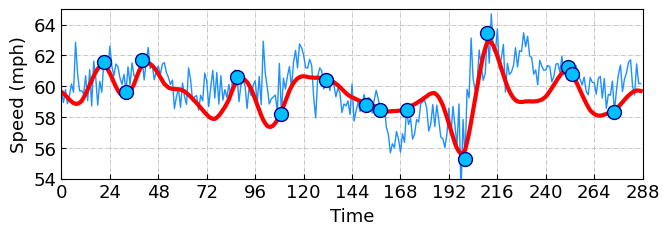

In [7]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.95
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/speed.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

lmbda = 1e-2 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_vec, sparse_vec, lmbda, gamma, tau, maxiter)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

fig = plt.figure(figsize = (7.5, 2.2))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1)
plt.plot(x[: 96 * d], 'red', linewidth = 3)
plt.plot(np.arange(0, 96 * d), sparse_vec[: 96 * d], 'o', 
         markeredgecolor = 'darkblue', 
         markerfacecolor = 'deepskyblue', markersize = 10)
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.xlim([0, 96 * d])
plt.ylim([54, 65])
plt.xticks(np.arange(0, 96 * d + 1, 24))
plt.yticks(np.arange(54, 66, 2))
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

plt.savefig('speeds_{}.pdf'.format(round(missing_rate * 100)), bbox_inches = 'tight')
plt.show()

Portland traffic volume time series imputation on the partially observed data with the 95% missing rate.

Missing rate = 0.95
100
0.18211719140071442
17.825794325341445



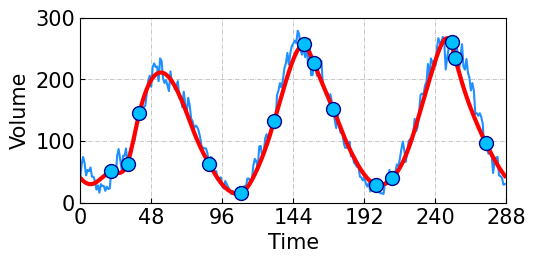

In [8]:
import numpy as np
np.random.seed(1)
import time

missing_rate = 0.95
print('Missing rate = {}'.format(missing_rate))

dense_mat = np.load('../datasets/Portland-data-set/volume.npy')
d = 3
dense_vec = dense_mat[0, : 96 * d]
T = dense_vec.shape[0]
sparse_vec = dense_vec * np.round(np.random.rand(T) + 0.5 - missing_rate)

lmbda = 1e-2 * T
gamma = 5 * lmbda
tau = 2
maxiter = 100
x = LCR(dense_vec, sparse_vec, lmbda, gamma, tau, maxiter)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize = (5.5, 2.4))
ax = fig.add_subplot(111)
plt.plot(dense_vec[: 96 * d], 'dodgerblue', linewidth = 1.5)
plt.plot(x[: 96 * d], 'red', linewidth = 3)
pos = np.where(sparse_vec != 0)
plt.plot(pos[0], sparse_vec[pos], 'o', 
         markeredgecolor = 'darkblue', 
         markerfacecolor = 'deepskyblue', markersize = 10)
plt.xlabel('Time')
plt.ylabel('Volume')
plt.xticks(np.arange(0, 96 * d + 1, 48))
plt.xlim([0, 96 * d])
plt.yticks(np.arange(0, 301, 100))
plt.ylim([0, 300])
plt.grid(linestyle = '-.', linewidth = 0.5)
ax.tick_params(direction = 'in')

# plt.savefig('volumes_95.pdf', bbox_inches = 'tight')
plt.show()

### License

<div class="alert alert-block alert-danger">
<b>This work is released under the MIT license.</b>
</div>